## Automating Bivariate Statistics Homework

The function we created in the chapter to calculate bivariate statistics based on the data types of the feature and label is copied below:

In [1]:
def unistats(df):
  import pandas as pd

  output_df = pd.DataFrame(columns=['Count', 'Unique', 'Type', 'Min', 'Max', '25%', '50%', '75%', 'Mean', 'Median', 'Mode', 'Std', 'Skew', 'Kurt'])

  for col in df.columns:
    # these are the outputs that apply to every variable regardless of data type
    count = df[col].count()
    unique = df[col].nunique()
    dtype = str(df[col].dtype)

    if pd.api.types.is_numeric_dtype(dtype):
      # perform additional calculations for numeric variables
      min = round(df[col].min(), 2)
      max = round(df[col].max(), 2)
      quar_1 = round(df[col].quantile(.25), 2)
      quar_2 = round(df[col].quantile(.50), 2)
      quar_3 = round(df[col].quantile(.75), 2)
      mean = round(df[col].mean(), 2)
      median = round(df[col].median(), 2)
      mode = round(df[col].mode().values[0], 2)  # Use the .values[0] to prevent the return of an extra printed datatype
      std = round(df[col].std(), 2)
      skew = round(df[col].skew(), 2)
      kurt = round(df[col].kurt(), 2)

      output_df.loc[col] = (count, unique, dtype, min, max, quar_1, quar_2, quar_3, mean, median, mode, std, skew, kurt)
    else:
      output_df.loc[col] = (count, unique, dtype, '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-')

  return output_df

def bivariate_stats(df, label, roundto=4):
  import pandas as pd
  from scipy import stats

  output_df = pd.DataFrame(columns=['missing', 'p', 'r', 'y = m(x) + b', 'F', 'X2'])

  for feature in df.columns:
    if feature != label:
      df_temp = df[[feature, label]]
      df_temp = df_temp.dropna()
      missing = (df.shape[0] - df_temp.shape[0]) / df.shape[0]

      if pd.api.types.is_numeric_dtype(df_temp[feature]) and pd.api.types.is_numeric_dtype(df_temp[label]):
        m, b, r, p, err = stats.linregress(df_temp[feature], df_temp[label])
        output_df.loc[feature] = [f'{missing:.2%}', round(p, roundto), round(r, roundto), f'y = {round(m, roundto)}(x) + {round(b, roundto)}', '-', '-']

      elif not pd.api.types.is_numeric_dtype(df_temp[feature]) and not pd.api.types.is_numeric_dtype(df_temp[label]):
        contingency_table = pd.crosstab(df_temp[feature], df_temp[label]) # Calculate the crosstab
        X2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Calculate the Chi-square based on the crosstab
        output_df.loc[feature] = [f'{missing:.2%}', round(p, roundto), '-', '-', '-', round(X2, roundto)]

      else:
        if pd.api.types.is_numeric_dtype(df_temp[feature]):
          num = feature
          cat = label
        else:
          num = label
          cat = feature

        groups = df_temp[cat].unique()
        group_lists = []
        for g in groups:
          g_list = df_temp[df_temp[cat] == g][num]
          group_lists.append(g_list)

        results = stats.f_oneway(*group_lists)
        F = results[0]
        p = results[1]
        output_df.loc[feature] = [f'{missing:.2%}', round(p, roundto), '-', '-', round(F, roundto), '-']
  return output_df.sort_values(by=['p'])

### Question 1:

Import the university student mental health dataset provided with this assessment. Pass the dataset into the univariate_stats() function copied from the chapter into the *Automating_Bivariate_Statistics.ipynb* included with this assessment. Print the results.

In [2]:
# Question 1:
import pandas as pd

df_mentalhealth = pd.read_csv(r'./mentalhealth.csv')

mentalhealth_stats = unistats(df_mentalhealth)

display(mentalhealth_stats)

,Count,Unique,Type,Min,Max,25%,50%,75%,Mean,Median,Mode,Std,Skew,Kurt
Timestamp,1000,16,object,-,-,-,-,-,-,-,-,-,-,-
Gender,1000,2,object,-,-,-,-,-,-,-,-,-,-,-
Age,1000,8,int64,18,25,19.0,21.0,24.0,21.4,21.0,18,2.37,0.01,-1.33
Course,1000,49,object,-,-,-,-,-,-,-,-,-,-,-
YearOfStudy,1000,7,object,-,-,-,-,-,-,-,-,-,-,-
CGPA,1000,187,float64,2.0,4.0,2.25,3.25,4.0,3.12,3.25,4.0,0.81,-0.22,-1.61
Depression,1000,2,int64,0,1,0.0,0.0,1.0,0.48,0.0,0,0.5,0.07,-2.0
Anxiety,1000,2,int64,0,1,0.0,0.0,1.0,0.47,0.0,0,0.5,0.1,-1.99
PanicAttack,1000,2,int64,0,1,0.0,0.0,1.0,0.46,0.0,0,0.5,0.17,-1.98
SpecialistTreatment,1000,2,int64,0,1,0.0,0.0,0.0,0.07,0.0,0,0.25,3.47,10.05


## Question 2:

Notice that many of the features are object or int data types even though they only have two unique values. Let's examine the actual data to determine whether we can easily cast these features into Boolean data types (e.g., if they are 0/1 values).

Print out the first five records of the dataset. This is technically not necessary to answer the question below, but we should always directly examing the data for any surprises.

In [3]:
# Question 2:
df_mentalhealth.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


## Question 3:

One of the primary purposes of exploring the data is to assess it's cleanliness and shape which determine the types of predictive and prescriptive analytics we can perform. The current version of unistats() does not tell us about the missing data that might cause problems later.

Modify the unistats function to also include the number of missing values and the percent of missing values for each column. Add the logic for this code in the most appropriate place in the flow of logic. Include these two new columns after count and before unique.

IMPORTANT: we don't want to overwrite the prior version of unistats because your answers in Question 1 and 2 depend on it. So you should copy the function into this question code block and modify this copied version.

In [4]:
# Question 3
def unistats(df):
  import pandas as pd

  output_df = pd.DataFrame(columns=['Count', 'Missing', '%Missing', 'Unique', 'Type', 'Min', 'Max', '25%', '50%', '75%', 'Mean', 'Median', 'Mode', 'Std', 'Skew', 'Kurt'])

  for col in df.columns:
    # these are the outputs that apply to every variable regardless of data type
    count = df[col].count()
    missing = df[col].isna().sum()
    percent_missing = (df[col].isna().sum() / len(df[col])) * 100
    unique = df[col].nunique()
    dtype = str(df[col].dtype)

    if pd.api.types.is_numeric_dtype(dtype):
      # perform additional calculations for numeric variables
      min = round(df[col].min(), 2)
      max = round(df[col].max(), 2)
      quar_1 = round(df[col].quantile(.25), 2)
      quar_2 = round(df[col].quantile(.50), 2)
      quar_3 = round(df[col].quantile(.75), 2)
      mean = round(df[col].mean(), 2)
      median = round(df[col].median(), 2)
      mode = round(df[col].mode().values[0], 2)  # Use the .values[0] to prevent the return of an extra printed datatype
      std = round(df[col].std(), 2)
      skew = round(df[col].skew(), 2)
      kurt = round(df[col].kurt(), 2)

      output_df.loc[col] = (count, missing, percent_missing, unique, dtype, min, max, quar_1, quar_2, quar_3, mean, median, mode, std, skew, kurt)
    else:
      output_df.loc[col] = (count, missing, percent_missing, unique, dtype, '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-')

  return output_df

unistats(df_mentalhealth)

,Count,Missing,%Missing,Unique,Type,Min,Max,25%,50%,75%,Mean,Median,Mode,Std,Skew,Kurt
Timestamp,1000,0,0.0,16,object,-,-,-,-,-,-,-,-,-,-,-
Gender,1000,0,0.0,2,object,-,-,-,-,-,-,-,-,-,-,-
Age,1000,0,0.0,8,int64,18,25,19.0,21.0,24.0,21.4,21.0,18,2.37,0.01,-1.33
Course,1000,0,0.0,49,object,-,-,-,-,-,-,-,-,-,-,-
YearOfStudy,1000,0,0.0,7,object,-,-,-,-,-,-,-,-,-,-,-
CGPA,1000,0,0.0,187,float64,2.0,4.0,2.25,3.25,4.0,3.12,3.25,4.0,0.81,-0.22,-1.61
Depression,1000,0,0.0,2,int64,0,1,0.0,0.0,1.0,0.48,0.0,0,0.5,0.07,-2.0
Anxiety,1000,0,0.0,2,int64,0,1,0.0,0.0,1.0,0.47,0.0,0,0.5,0.1,-1.99
PanicAttack,1000,0,0.0,2,int64,0,1,0.0,0.0,1.0,0.46,0.0,0,0.5,0.17,-1.98
SpecialistTreatment,1000,0,0.0,2,int64,0,1,0.0,0.0,0.0,0.07,0.0,0,0.25,3.47,10.05


## Question 4:

Normally, we would also create univariate charts (histograms and count bar charts). But we will skip that step to keep this assignment as short as possible.

Next, recall that the question we are interested in answering with this dataset is, "What causes university students to seek mental health treatment?" There is a feature called SpecialistTreatment that represents whether each case/row/student has sought treatment; 0 = False, 1 = True. We will use this feature as our label.

Call the bivariate_stats function using this dataset and label and print out the results.

In [5]:
# Question 4:
bivariate_stats(df_mentalhealth, 'SpecialistTreatment')

,missing,p,r,y = m(x) + b,F,X2
Course,0.00%,0.0000,-,-,5.1608,-
YearOfStudy,0.00%,0.0000,-,-,8.3876,-
HasMentalHealthSupport,0.00%,0.0000,1.0,y = 1.0(x) + 0.0,-,-
SleepQuality,0.00%,0.2074,0.0399,y = 0.007(x) + 0.046,-,-
PanicAttack,0.00%,0.2346,-0.0376,y = -0.0189(x) + 0.0756,-,-
AcademicEngagement,0.00%,0.2367,0.0375,y = 0.0066(x) + 0.0469,-,-
Timestamp,0.00%,0.2378,-,-,1.236,-
Age,0.00%,0.2399,0.0372,y = 0.0039(x) + -0.0169,-,-
StudyHoursPerWeek,0.00%,0.4340,-0.0248,y = -0.0011(x) + 0.0777,-,-
Depression,0.00%,0.5506,-0.0189,y = -0.0095(x) + 0.0716,-,-


## Question 5:

Take a closer look at the results for *HasMentalHealthSupport* from the prior question and from Question 1. Notice that there is a perfection correlation (r = 1.0) between *HasMentalHealthSupport* and *SpecialistTreatment*. They also have the same mean (0.07) and other univariate properties. This tells me that the student survey respondents likely interpreted having mental health support the same as seeking treatment. In other words, the data in these two features is identical. Therefore, we should not use HasMetnalHealthSupport as a predictor or indicator of SeekingTreatment because they are essentially the same thing.

Instead, let's focus on understanding the other two features that had p-values close to zero: Course and YearOfStudy. We already know that these features highly related to *SpecialistTreatment*. But to understand how these features determine *SpecialistTreatment*, we need to generate bar charts of their relationships with *SpecialistTreatment*. We already did this in the chapter. So you are welcome to copy any code you want from the chapter or generate your own new code.

Create a bivariate chart for at least *Course* and *YearOfStudy* with the *SpecialistTreatment*. However, if you want to use the automation code from the chapter, you can create bivariate charts for every feature with *SpecialistTreatment*.

NOTES:

*  Before you plot all course's mean *SpecialistTreatment*, first group courses based on the 5% rule as we did in the chapter. You should end up with only four courses: Engineering, BIT, BCS, and Other
*  It may be hard to see if you copied the code from the book because there are so many courses and the text runs together. Therefore, add code to rotate the x-axis labels 90 degrees so the text is easier to read.



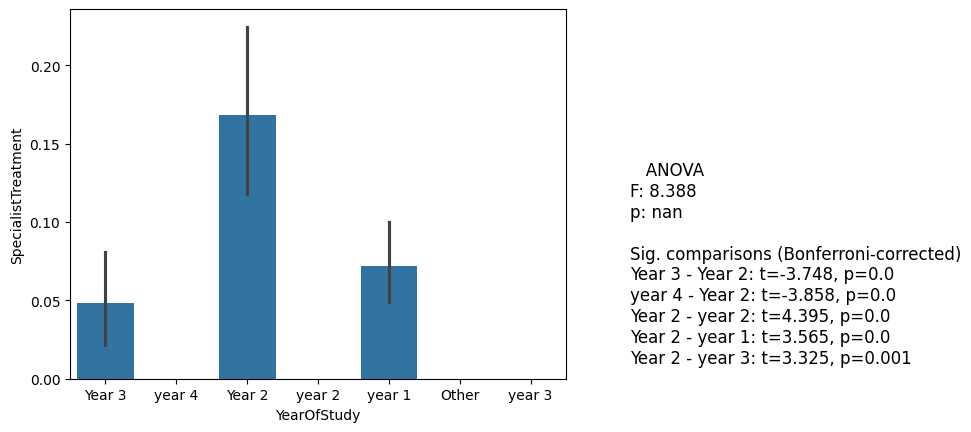

In [16]:

def bin_categories(df, features=[], cutoff=0.05, replace_with="Other", messages=True):
    import pandas as pd

    if len(features) == 0:
        features = df.columns

    for feat in features:
        if feat in df.columns:
            # get a list of group values and their percent of rows
            if not pd.api.types.is_numeric_dtype(df[feat]):
                group_count = df[feat].value_counts()
                other_list = group_count[group_count / df.shape[0] < cutoff].index
                df.loc[df[feat].isin(other_list), feat] = replace_with
            # filter the list down to those that represent less than 5% of the rows
            # update the group name to "Other" for all of those filtered values

        else:
            print(f"{feat} not found in dataframe")    
    return df

def bar_chart(df, feature, label, roundto=3):
  import pandas as pd
  from scipy import stats
  from matplotlib import pyplot as plt
  import seaborn as sns

  # Handle missing data
  df_temp = df[[feature, label]]
  df_temp = df_temp.dropna()

  sns.barplot(df_temp, x=feature, y=label)

  # Create the label lists needed to calculate oneway-ANOVA F
  groups = df_temp[feature].unique()
  group_lists = []
  for g in groups:
    g_list = df_temp[df_temp[feature] == g][label]
    group_lists.append(g_list)

  results = stats.f_oneway(*group_lists)
  F = results[0]
  p = results[1]

  # Next, calculate t-tests with Bonferroni correction for p-value threshold
  ttests = []
  for i1, g1 in enumerate(groups): # Use the enumerate() function to add an index for counting to a list of values
    # For each item, loop through a second list of each item to compare each pair
    for i2, g2 in enumerate(groups):
      if i2 > i1: # If the inner_index is greater that the outer_index, then go ahead and run a t-test
        type_1 = df_temp[df_temp[feature] == g1]
        type_2 = df_temp[df_temp[feature] == g2]
        t, p = stats.ttest_ind(type_1[label], type_2[label])

        # Add each t-test result to a list of t, p pairs
        ttests.append([str(g1) + ' - ' + str(g2), round(t, roundto), round(p, roundto)])

  p_threshold = 0.05 / len(ttests) # Bonferroni-corrected p-value determined

  # Add all descriptive statistics to the diagram
  textstr  = '   ANOVA' + '\n'
  textstr += 'F: ' + str(round(F, roundto)) + '\n'
  textstr += 'p: ' + str(round(p, roundto)) + '\n\n'

  # Only include the significant t-tests in the printed results for brevity
  for ttest in ttests:
    if ttest[2] <= p_threshold:
      if 'Sig. comparisons (Bonferroni-corrected)' not in textstr: # Only include the header if there is at least one significant result
        textstr += 'Sig. comparisons (Bonferroni-corrected)' + '\n'
      textstr += str(ttest[0]) + ": t=" + str(ttest[1]) + ", p=" + str(ttest[2]) + '\n'

  plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
  plt.show()

binned_df = bin_categories(df_mentalhealth, features=['YearOfStudy'])
bar_chart(binned_df, 'YearOfStudy', 'SpecialistTreatment')